In [2]:
# Import Librarires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub 

In [3]:
# # Download latest version
# path = kagglehub.dataset_download("wenruliu/adult-income-dataset")

# print("Path to dataset files:", path)

In [4]:
# loading dataset
path = '../../datasets/adult.csv'
base = pd.read_csv(path)
base.head(2)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K


In [5]:
# information about the dataset
base.info()
base.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
# Dropping unnecessary columns
base.drop(['fnlwgt', 'education' ], axis=1, inplace=True)

# Renaming columns
cols = base.columns.tolist()
print(cols)

['age', 'workclass', 'educational-num', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']


In [7]:
# checking missng values
print(base.isnull().sum())

age                0
workclass          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64


In [8]:
# separating categorical and numerical columns
num_cols = base.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = base.select_dtypes(include=['object']).columns.tolist()
# cat_cols.remove('income') # removing target variable from categorical columns
print("Numerical columns:", num_cols)
print("Categorical columns:", cat_cols)

Numerical columns: ['age', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']
Categorical columns: ['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country', 'income']


In [9]:
# further separating categorical columns into binary and non-binary
binary_cols = []
non_binary_cols = []
for col in cat_cols:
     if base[col].nunique() == 2:
          binary_cols.append(col)
     else:
          non_binary_cols.append(col)
print("Binary columns:", binary_cols)
print("Non-binary columns:", non_binary_cols)

Binary columns: ['gender', 'income']
Non-binary columns: ['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'native-country']


In [10]:
# Removing Outliers
from scipy import stats

z_scores = stats.zscore(base[num_cols])
abs_Z_score = abs(z_scores)
filtered_entries = (abs_Z_score < 3).all(axis=1)

base = base[filtered_entries]

In [11]:
#%pip install scikit-learn
from sklearn.preprocessing import LabelEncoder 

le = LabelEncoder()
for col in binary_cols:
     base[col] = le.fit_transform(base[col])

# one-hot encoding
base = pd.get_dummies(base, columns=non_binary_cols, drop_first=True).astype(int)

In [12]:
print(base.head(2))
print("New shape:", base.shape)

   age  educational-num  gender  capital-gain  capital-loss  hours-per-week  \
0   25                7       1             0             0              40   
1   38                9       1             0             0              50   

   income  workclass_Federal-gov  workclass_Local-gov  workclass_Never-worked  \
0       0                      0                    0                       0   
1       0                      0                    0                       0   

   ...  native-country_Portugal  native-country_Puerto-Rico  \
0  ...                        0                           0   
1  ...                        0                           0   

   native-country_Scotland  native-country_South  native-country_Taiwan  \
0                        0                     0                      0   
1                        0                     0                      0   

   native-country_Thailand  native-country_Trinadad&Tobago  \
0                        0              

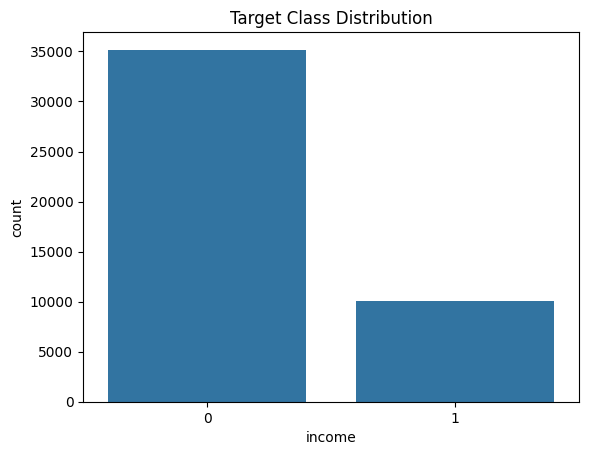

income
0    35170
1    10016
Name: count, dtype: int64


In [13]:
# Check class imbalance
sns.countplot(x='income', data=base)
plt.title("Target Class Distribution")
plt.show()
print(base['income'].value_counts())

In [14]:
# Separate features and target
X = base.drop(columns=['income'])
y = base['income']

In [15]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X, y)

print("Before SMOTE:", y.value_counts().to_dict())
print("After SMOTE:", y_resampled.value_counts().to_dict())


Before SMOTE: {0: 35170, 1: 10016}
After SMOTE: {0: 35170, 1: 35170}


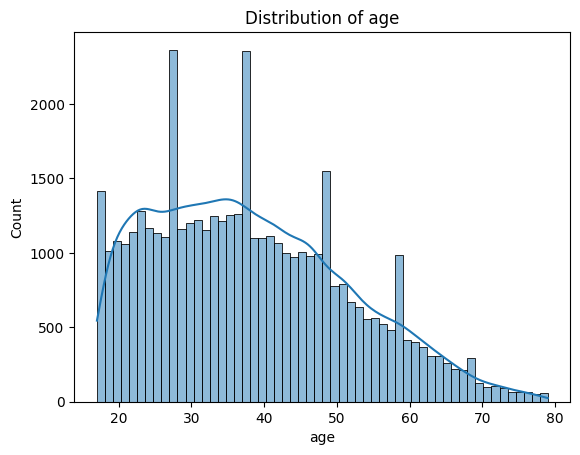

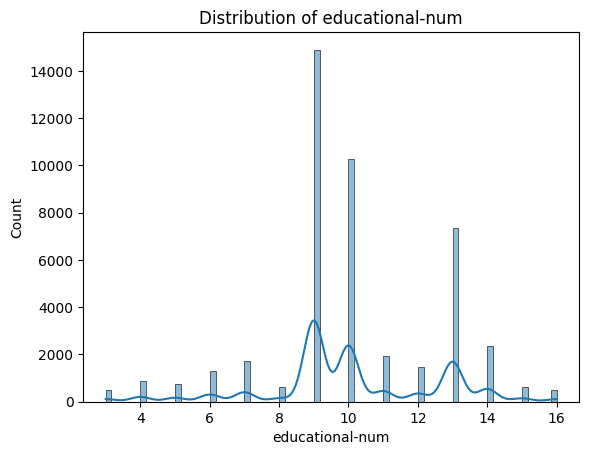

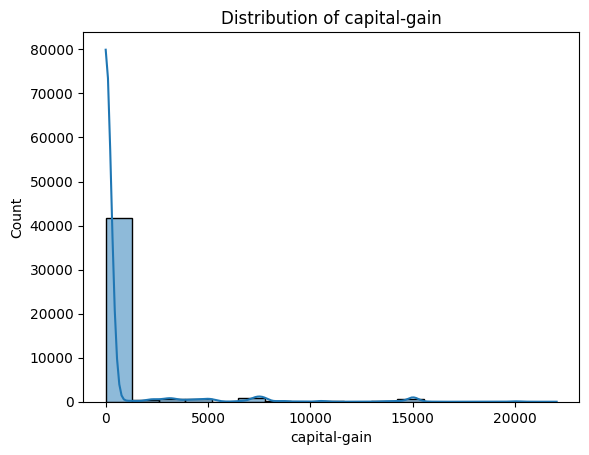

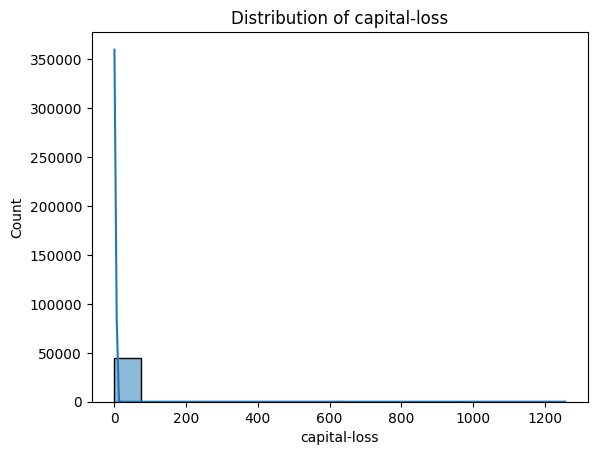

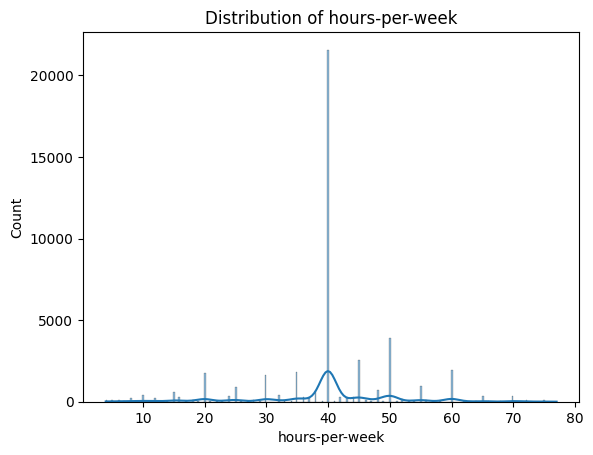

In [16]:
# Visualize the distribution of numerical cols
for col in num_cols:
    sns.histplot(base[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

In [17]:
# Scaling / normalization based on plots SC for bell curves & Min-Max for others
skewed_cols = ['age', 'hours-per-week']
normal_cols = [col for col in num_cols if col not in skewed_cols]

print(skewed_cols, "\n\n", normal_cols)

['age', 'hours-per-week'] 

 ['educational-num', 'capital-gain', 'capital-loss']


In [18]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

sc = StandardScaler()
mms = MinMaxScaler()

X_resampled[normal_cols] = sc.fit_transform(X_resampled[normal_cols])
X_resampled[skewed_cols] = mms.fit_transform(X_resampled[skewed_cols])


In [19]:
# Save processed dataset to CSV

df_final = pd.concat([X_resampled, y_resampled], axis=1)
df_final.to_csv('../../datasets/processed_adult.csv', index=False)

In [20]:
# Feature selection using Random Forest importance
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_resampled, y_resampled)

importances = rf.feature_importances_
feat_importance_df = pd.DataFrame({'feature': X_resampled.columns, 'importance': importances})
feat_importance_df = feat_importance_df.sort_values(by='importance', ascending=False)

In [21]:
# Select top 20 features
top_features = feat_importance_df.head(20)['feature'].tolist()
print("Top features:", top_features)


Top features: ['age', 'educational-num', 'marital-status_Married-civ-spouse', 'hours-per-week', 'marital-status_Never-married', 'capital-gain', 'relationship_Not-in-family', 'relationship_Unmarried', 'relationship_Own-child', 'occupation_Other-service', 'gender', 'occupation_Craft-repair', 'workclass_Self-emp-not-inc', 'workclass_Private', 'occupation_Machine-op-inspct', 'occupation_Adm-clerical', 'occupation_Farming-fishing', 'occupation_Handlers-cleaners', 'occupation_Transport-moving', 'occupation_Exec-managerial']


In [22]:
# Dataset with selected features
X_selected = X_resampled[top_features]

In [23]:
# Un-Supervised Learning
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# Downsampling for DBSCAN (safe size: ~5K) because the kernel was crashing against the full dataset. limitations
X_downsampled = X_selected.sample(n=5000, random_state=42)

# KMeans on full data
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X_selected)
kmeans_silhouette = silhouette_score(X_selected, kmeans_labels)

# DBSCAN on downsampled + Principle Component Analysis
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_downsampled)

try:
    dbscan = DBSCAN(eps=1.0, min_samples=5)
    dbscan_labels = dbscan.fit_predict(X_pca)
    
    if len(set(dbscan_labels)) > 1:
        dbscan_s= silhouette_score(X_pca, dbscan_labels)
    else:
        dbscan_s = "Not Applicable"

except Exception as e:
    dbscan_s = f"Error: {e}"
    dbscan_labels = []

# Results
print("KMeans Silhouette Score (full):", kmeans_silhouette)
print("DBSCAN Silhouette Score (downsampled):", dbscan_s)
print("KMeans Clusters:", len(set(kmeans_labels)))
if isinstance(dbscan_labels, np.ndarray) and dbscan_labels.size > 0:
    print("DBSCAN Clusters:", len(set(dbscan_labels)))
else:
    print("DBSCAN Clusters: Not computed")

KMeans Silhouette Score (full): 0.22742692227744724
DBSCAN Silhouette Score (downsampled): 0.5649607594608371
KMeans Clusters: 2
DBSCAN Clusters: 2


In [24]:
# Importing Supervised Learning Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier 
from xgboost import XGBClassifier

# 5 Supervised Learning Classifiers 
models = {
    "Logistic Regression": LogisticRegression(max_iter=100),
    "Random Forest": RandomForestClassifier(n_estimators=10),
    "SVM": SVC(max_iter=500),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=10),
    "xgboost": XGBClassifier(n_estimators=10)
}

In [25]:
df_final.head(3)

,age,educational-num,gender,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income
0,0.129032,-1.433166,1,-0.327072,-0.028197,0.493151,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
1,0.338710,-0.617022,1,-0.327072,-0.028197,0.630137,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
2,0.177419,0.607194,1,-0.327072,-0.028197,0.493151,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1


In [27]:
# Import Classification libs
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split


def evaluate_models(X_train, y_train, X_test, y_test, source):
    print(f"\n Results Using {source} Data")
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        print(f"\n Model: {name}")
        print("Accuracy:", accuracy_score(y_test, y_pred))
        print("Precision:", precision_score(y_test, y_pred, average='weighted'))
        print("Recall:", recall_score(y_test, y_pred, average='weighted'))
        print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))
        print("Classification Report:\n", classification_report(y_test, y_pred))
        print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

evaluate_models(X_train, y_train, X_test, y_test, source="Original")

# Train & Evaluate on SMOTE-balanced data
# evaluate_models(X_smote, y_smote, X_test, y_test, source="SMOTE")


 Results Using Original Data

 Model: Logistic Regression
Accuracy: 0.8624301014121885
Precision: 0.8631263450155879
Recall: 0.8624301014121885
F1 Score: 0.8623439641431823
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.84      0.86     10493
           1       0.85      0.89      0.87     10609

    accuracy                           0.86     21102
   macro avg       0.86      0.86      0.86     21102
weighted avg       0.86      0.86      0.86     21102

Confusion Matrix:
 [[8805 1688]
 [1215 9394]]

 Model: Random Forest
Accuracy: 0.8853189271159132
Precision: 0.8853748394187182
Recall: 0.8853189271159132
F1 Score: 0.8853100994497968
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.88      0.88     10493
           1       0.88      0.89      0.89     10609

    accuracy                           0.89     21102
   macro avg       0.89      0.89      0.89     2

/workspaces/ml_techniques/.venv/lib/python3.12/site-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(



 Model: SVM
Accuracy: 0.5402805421287081
Precision: 0.5521573642023734
Recall: 0.5402805421287081
F1 Score: 0.5087710116916894
Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.29      0.38     10493
           1       0.53      0.79      0.63     10609

    accuracy                           0.54     21102
   macro avg       0.55      0.54      0.51     21102
weighted avg       0.55      0.54      0.51     21102

Confusion Matrix:
 [[3001 7492]
 [2209 8400]]

 Model: K-Nearest Neighbors
Accuracy: 0.8720974315230784
Precision: 0.8733094081955131
Recall: 0.8720974315230784
F1 Score: 0.8719696925475786
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.84      0.87     10493
           1       0.85      0.90      0.88     10609

    accuracy                           0.87     21102
   macro avg       0.87      0.87      0.87     21102
weighted avg       0.87      0.87  